## 1. Linearity Assumption
We'll create a simple dataset with a linear relationship, and another where the relationship is nonlinear to demonstrate violation.

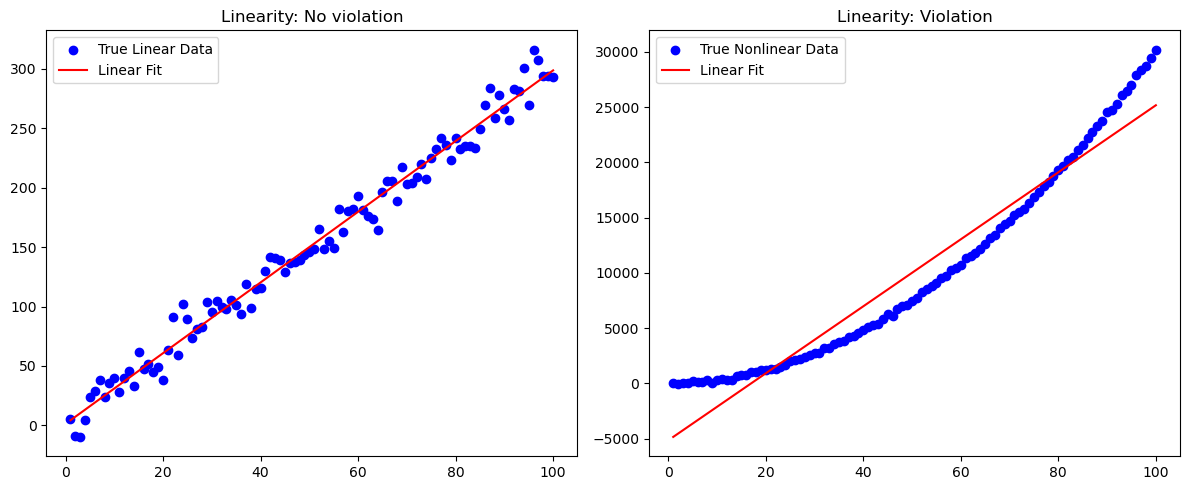

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Linearly related data (satisfies assumption)
X = np.linspace(1, 100, 100).reshape(-1, 1)
y_linear = 3 * X.flatten() + np.random.randn(100) * 10

# Nonlinearly related data (violates assumption)
y_nonlinear = 3 * X.flatten() ** 2 + np.random.randn(100) * 100

# Fit linear models
model_linear = LinearRegression().fit(X, y_linear)
model_nonlinear = LinearRegression().fit(X, y_nonlinear)

# Predictions
y_pred_linear = model_linear.predict(X)
y_pred_nonlinear = model_nonlinear.predict(X)

# Plot: Linearity assumption holds vs violation
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(X, y_linear, color='blue', label='True Linear Data')
plt.plot(X, y_pred_linear, color='red', label='Linear Fit')
plt.title('Linearity: No Violation')
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(X, y_nonlinear, color='blue', label='True Nonlinear Data')
plt.plot(X, y_pred_nonlinear, color='red', label='Linear Fit')
plt.title('Linearity: Violation')
plt.legend()

plt.tight_layout()
plt.show()

## 2. Independence of Errors (No Autocorrelation)

To simulate this, we'll generate time-series data. One set will have autocorrelation, while another will not.

Durbin-Watson for independent errors: 2.08 (should be close to 2)
Durbin-Watson for autocorrelated errors: 0.16 (closer to 0 or 4 indicates autocorrelation)


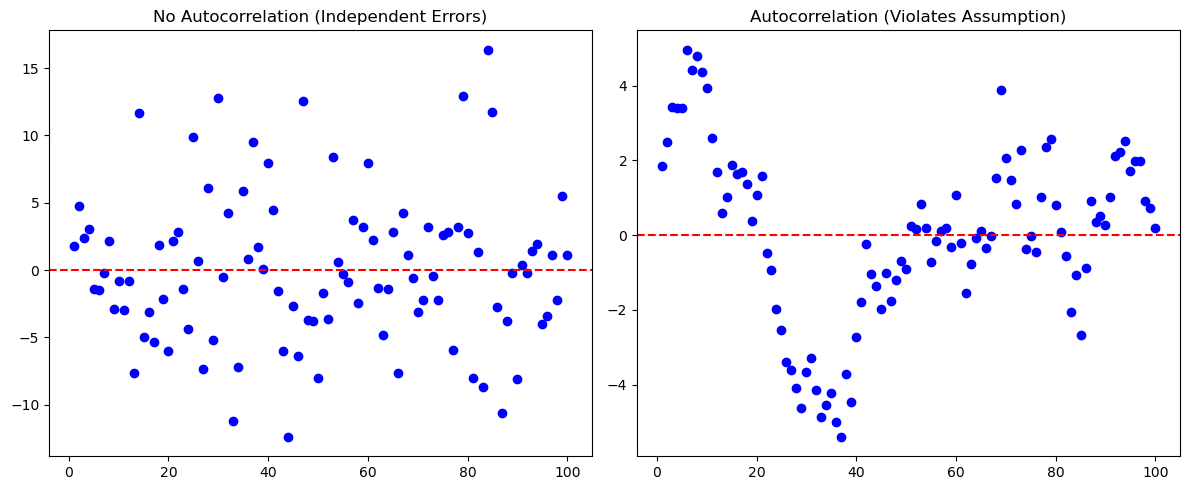

In [4]:
from statsmodels.stats.stattools import durbin_watson

# Independent residuals (satisfies assumption)
y_no_auto = np.linspace(1, 100, 100) + np.random.randn(100) * 5

# Autocorrelated residuals (violates assumption)
y_auto = np.cumsum(np.random.randn(100))  # Simulates autocorrelation

# Fit models
model_no_auto = LinearRegression().fit(X, y_no_auto)
model_auto = LinearRegression().fit(X, y_auto)

# Durbin-Watson test
dw_no_auto = durbin_watson(y_no_auto - model_no_auto.predict(X))
dw_auto = durbin_watson(y_auto - model_auto.predict(X))

print(f'Durbin-Watson for independent errors: {dw_no_auto:.2f} (should be close to 2)')
print(f'Durbin-Watson for autocorrelated errors: {dw_auto:.2f} (closer to 0 or 4 indicates autocorrelation)')

# Plot residuals for autocorrelation assumption
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(X, y_no_auto - model_no_auto.predict(X), color='blue')
plt.axhline(y=0, color='red', linestyle='--')
plt.title('No Autocorrelation (Independent Errors)')

plt.subplot(1, 2, 2)
plt.scatter(X, y_auto - model_auto.predict(X), color='blue')
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Autocorrelation (Violates Assumption)')

plt.tight_layout()
plt.show()

## 3. Homoscedasticity (Constant Variance of Errors)

We'll generate data where residuals have constant variance and where variance increases as the value of the independent variable increases (heteroscedasticity).

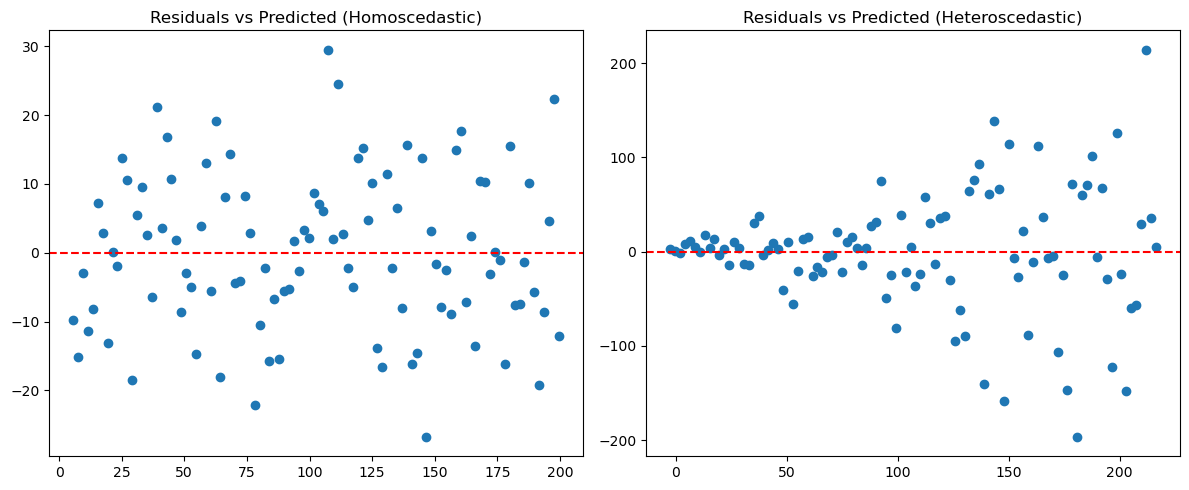

In [5]:
# Homoscedastic data (satisfies assumption)
y_homoscedastic = 2 * X.flatten() + np.random.randn(100) * 10

# Heteroscedastic data (violates assumption)
y_heteroscedastic = 2 * X.flatten() + (np.random.randn(100) * X.flatten())

# Fit models
model_homoscedastic = LinearRegression().fit(X, y_homoscedastic)
model_heteroscedastic = LinearRegression().fit(X, y_heteroscedastic)

# Residuals
residuals_homo = y_homoscedastic - model_homoscedastic.predict(X)
residuals_hetero = y_heteroscedastic - model_heteroscedastic.predict(X)

# Plot residuals vs fitted values (Homoscedasticity)
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(model_homoscedastic.predict(X), residuals_homo)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residuals vs Predicted (Homoscedastic)')

plt.subplot(1, 2, 2)
plt.scatter(model_heteroscedastic.predict(X), residuals_hetero)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residuals vs Predicted (Heteroscedastic)')

plt.tight_layout()
plt.show()

## 4. Multicollinearity
We’ll create data where two independent variables are highly correlated, leading to multicollinearity.\
Interpretation: A VIF greater than 10 indicates high multicollinearity.

In [6]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

# Two highly correlated variables (violates assumption)
X1 = np.random.rand(100)
X2 = X1 + np.random.normal(0, 0.01, 100)  # Strongly correlated with X1
X3 = np.random.rand(100)  # Not correlated with X1

X_multicollinear = np.column_stack([X1, X2, X3])

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["feature"] = ['X1', 'X2', 'X3']
vif_data["VIF"] = [variance_inflation_factor(X_multicollinear, i) for i in range(X_multicollinear.shape[1])]

print(vif_data)

  feature          VIF
0      X1  2830.809341
1      X2  2827.608504
2      X3     2.130666


## 5.Normality of Residuals

To demonstrate this, we’ll create a normally distributed residual set and another with skewed residuals.

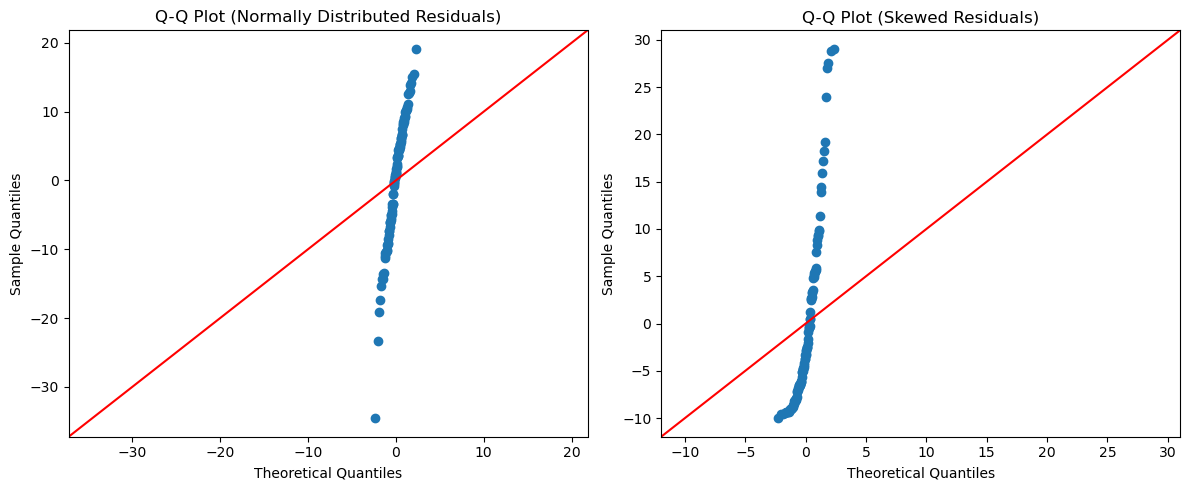

In [7]:
import statsmodels.api as sm

# Normally distributed residuals (satisfies assumption)
y_normal = 2 * X.flatten() + np.random.randn(100) * 10

# Skewed residuals (violates assumption)
y_skewed = 2 * X.flatten() + np.random.exponential(scale=10, size=100)

# Fit models
model_normal = LinearRegression().fit(X, y_normal)
model_skewed = LinearRegression().fit(X, y_skewed)

# Residuals
residuals_normal = y_normal - model_normal.predict(X)
residuals_skewed = y_skewed - model_skewed.predict(X)

# Q-Q plot (Normality)
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sm.qqplot(residuals_normal, line='45', ax=plt.gca())
plt.title('Q-Q Plot (Normally Distributed Residuals)')

plt.subplot(1, 2, 2)
sm.qqplot(residuals_skewed, line='45', ax=plt.gca())
plt.title('Q-Q Plot (Skewed Residuals)')

plt.tight_layout()
plt.show()

## Visualizing the Assumptions
You can check these assumptions using diagnostic plots in Python. Here’s an example of how to create some of these plots:

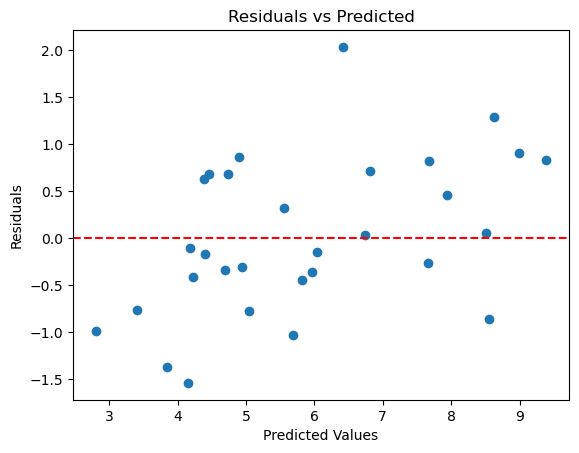

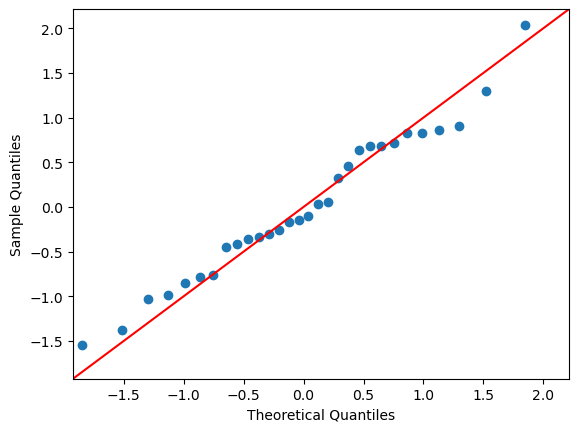

In [1]:
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Example dataset
np.random.seed(42)
X = np.random.rand(100, 3)
y = 1 + 2 * X[:, 0] + 3 * X[:, 1] + 4 * X[:, 2] + np.random.randn(100)

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Fit the model
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Residuals
residuals = y_test - y_pred

# Residual plot (for checking homoscedasticity)
plt.scatter(y_pred, residuals)
plt.title('Residuals vs Predicted')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

# Q-Q plot (for checking normality of residuals)
sm.qqplot(residuals, line ='45')
plt.show()